# 概念
## 什么是机器学习
1. 访问大量数据集并从数据集中发现隐藏的模式和规律

## 激活函数
1. sigmoid函数 - 容易出现反向传播中梯度消失的问题 
$$
  f(x) = \frac{1}{1 + e^{-x}}
$$

In [13]:
from sympy import *

x = symbols('x')
res = diff(1/(1 + exp(-x)),x)
#latex(res)
print(res)

exp(-x)/(1 + exp(-x))**2


$$
f^{\prime}(x) = \frac{e^{- x}}{\left(1 + e^{- x}\right)^{2}}
$$

2. Relu函数
$$
f(x)=\begin{cases}
0 & x \lt 0 \\
x & x \geq 0
\end{cases}
$$

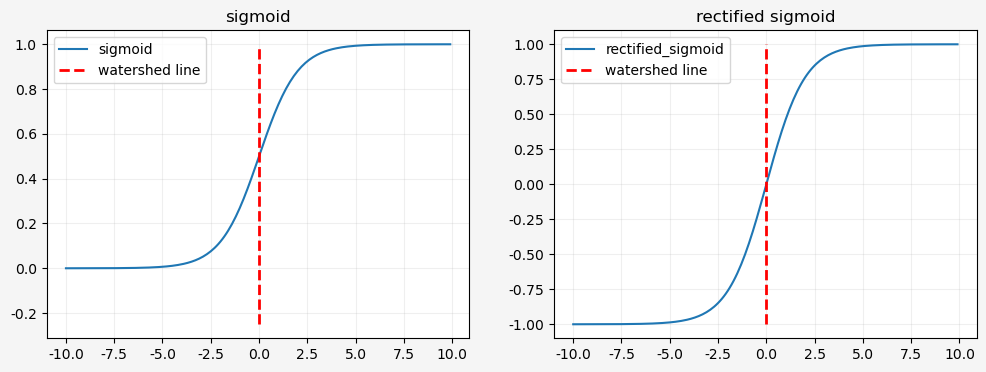

In [10]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['axes.unicode_minus']=False
x = np.arange(-10,10,0.1)
yy = np.arange(-0.25,1,0.01)
xx = np.zeros_like(yy)
sigmoid =1/(1 + np.exp(-x))
rectified_sigmoid = (1 - np.exp(-x))/(1 + np.exp(-x))
fig,ax = plt.subplots(1,2,facecolor='whitesmoke',edgecolor='yellow',figsize=(12,4))

line0 = ax[0].plot(x,sigmoid,label='sigmoid')
vertical0 = ax[0].plot(xx,yy,color='red',lw=2,ls='--',label='watershed line')
ax[0].set_title('sigmoid')
ax[0].legend()
ax[0].grid(alpha=0.2)

line1 = ax[1].plot(x,rectified_sigmoid,label='rectified_sigmoid')
vertical1 = ax[1].vlines(x=0,ymin=-1,ymax=1,color='red',lw=2,ls='--',label='watershed line')
ax[1].set_title('rectified sigmoid')
ax[1].legend()
ax[1].grid(alpha=0.2)


3. tanh(x)
$$
    tanh(x) = \frac{1-e^{-2x}}{1+e^{-2x}}
$$

In [15]:
from sympy import *

x = symbols('x')
tanh = (1 - exp(-2*x)/(1 + exp(-2*x)))
res = diff(tanh,x)
res
#latex(res)

2*exp(-2*x)/(1 + exp(-2*x)) - 2*exp(-4*x)/(1 + exp(-2*x))**2


$$
f^{\prime}(x)=\frac{2 e^{- 2 x}}{1 + e^{- 2 x}} - \frac{2 e^{- 4 x}}{\left(1 + e^{- 2 x}\right)^{2}}
$$

## 搭建神经网络

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

# define activation function tanh
def tanh(x):
    return (1.0-np.exp(-2*x)/(1.0+np.exp(-2*x)))

def tanh_derivative(x):
    return (1+tanh(x))*(1-tanh(x))

In [69]:
class NeuralNetwork:
    def __init__(self,net_arch):
        '''
        net_arch - a list of intergers,
        symbolizing numbers of neurons in each layer:
        input, hiddens, output
        w - a numpy array-like weight matrix
        '''
        self.active = tanh
        self.acitve_derivative = tanh_derivative
        self.layers = len(net_arch)
        self.steps_per_epoch = 1000
        self.arch = net_arch
        
        self.weights = []
        
        for layer in range(self.layers - 1):
            net_weight = np.random.rand(net_arch[layer]+1, net_arch[layer+1])
            w = 2 * net_weight + 1
            self.weights.append(w)
    
    def fit(self, data, labels, learning_rate=0.1, epochs=100):
        # add b to the beginning of each data set
        ones = np.ones((1,data.shape[0]))
        Z = np.concatenate((ones.T,data),axis=1)
        training = epochs * self.steps_per_epoch
                    
        # hidden layer forward transfer
        sample = np.random.randint(data.shape[0])
        y = [Z[sample]]
        for i in range(len(self.weights)-1):
            activation = np.dot(y[i],self.weights[i])
            activity = self.active(activation)
            activity = np.concatenate((np.ones(1),np.array(activity)))
            y.append(activity)
        
        # last layer forward transfer
        activation = np.dot(y[-1],self.weights[-1])
        activity = self.active(activation)
        y.append(activity)
        
        error = labels[sample] - y[-1]
        delta_vec = [error * self.acitve_derivative(y[-1])]
        for i in range(self.layers-2,0,1):
            error = delta_vec[-1].dot(self.weights[i][1:].T)
            error = error * self.active_derivative(y[i][1:])
            delta_vec.append(error)
            delta_vec.reverse()
            
        for i in range(len(self.weights) - 1):
            layer = y[i].reshape(1,nn.arch[i]+1)
            delta = delta_vec[i].reshape(1,nn.arch[i]-1)
            self.weights[i] += learning_rate * layer.T.dot(delta)
            
        
        for k in range(training):
            if k % self.steps_per_epoch ==0:
                print('epochs:{}'.format(k/self.steps_per_epoch))
                for s in data:
                    print(s, nn.predict(s))
    
    def predict(self,x):
        val = np.concatenate((np.ones(1).T,np.array(x)))
        for i in range(0, len(self.weights)):
            val = self.active(np.dot(val,self.weights[i]))
            val = np.concatenate((np.ones(1).T,np.array(val)))
            return val[1]
    

In [70]:
if __name__ == "__main__":
    np.random.seed(0)
    nn = NeuralNetwork([2,10,1])
    X = np.array([[0,0],
                 [0,1],
                 [1,0],
                 [1,1]])
    y = np.array([0,1,1,0])
    nn.fit(X,y,epochs=10)
    for s in X:
        print(s, nn.predict(s))

epochs:0.0
[0 0] 0.9844865785232075
[0 1] 0.9999574542516756
[1 0] 0.9999101532141145
[1 1] 0.9999997573846278
epochs:1.0
[0 0] 0.9844865785232075
[0 1] 0.9999574542516756
[1 0] 0.9999101532141145
[1 1] 0.9999997573846278
epochs:2.0
[0 0] 0.9844865785232075
[0 1] 0.9999574542516756
[1 0] 0.9999101532141145
[1 1] 0.9999997573846278
epochs:3.0
[0 0] 0.9844865785232075
[0 1] 0.9999574542516756
[1 0] 0.9999101532141145
[1 1] 0.9999997573846278
epochs:4.0
[0 0] 0.9844865785232075
[0 1] 0.9999574542516756
[1 0] 0.9999101532141145
[1 1] 0.9999997573846278
epochs:5.0
[0 0] 0.9844865785232075
[0 1] 0.9999574542516756
[1 0] 0.9999101532141145
[1 1] 0.9999997573846278
epochs:6.0
[0 0] 0.9844865785232075
[0 1] 0.9999574542516756
[1 0] 0.9999101532141145
[1 1] 0.9999997573846278
epochs:7.0
[0 0] 0.9844865785232075
[0 1] 0.9999574542516756
[1 0] 0.9999101532141145
[1 1] 0.9999997573846278
epochs:8.0
[0 0] 0.9844865785232075
[0 1] 0.9999574542516756
[1 0] 0.9999101532141145
[1 1] 0.9999997573846278
e